<a href="https://colab.research.google.com/github/cassyrr/World-Happiness-Score-Analysis/blob/main/World_Happiness_Score_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1. Overview of Dataset.**

The dataset for this project encapsulates the happiness index for each country, supplemented with indicators such as GDP (economic aspect), Life Expectancy (health dimension), and degrees of freedom. These pieces of data are instrumental for a thorough analysis examining how the local economy, health, and political factors influence people's well-being.

Explanation for certain variables:
* Economy,Family, Health, Freedom, Trust, Generosity: indicate the extend to which these factos contribute in evaluating the happiness in each country.

* Dystopia Residual: dystopia is an imaginary country that has the wold's least-happy people. The purpose is to have a benchmark to let real country can be compared against Dystopia to ensure that all countries score better than this lowest possible scenario.The "Dystopia Residual" refers to the gap between actual country data and the hypothetical dystopia. The residual is the difference between the predicted happiness score (based on the other factors) and the actual happiness score from the data. If a country's happiness score is higher than what can be explained by key variables, it will have a positive residual. If it's lower, it will have a negative residual.


**2. Data Exploration**

To better understand the dataset for the future analysis. I am going to perform a preliminary exploration. Here are my tasks:

(1) Identify data types;
(2) Summarize dataset;
(2) Identify quality issues, including missing, null value;
(3) Visualize the distribution of the dataset.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# upload dataset
df = pd.read_csv('https://drive.google.com/uc?id=1PcCyXXs28wvhAcatjBqa48hf9JD8_Xqa')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
# check data dimension, number of rows and columns
df.shape

(157, 13)

In [ ]:
# check data types (numerica/categorical)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
# obtain the summary of statistic for each variable
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [ ]:
# check missing value
df.isnull().sum() # there is no null or missing value

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

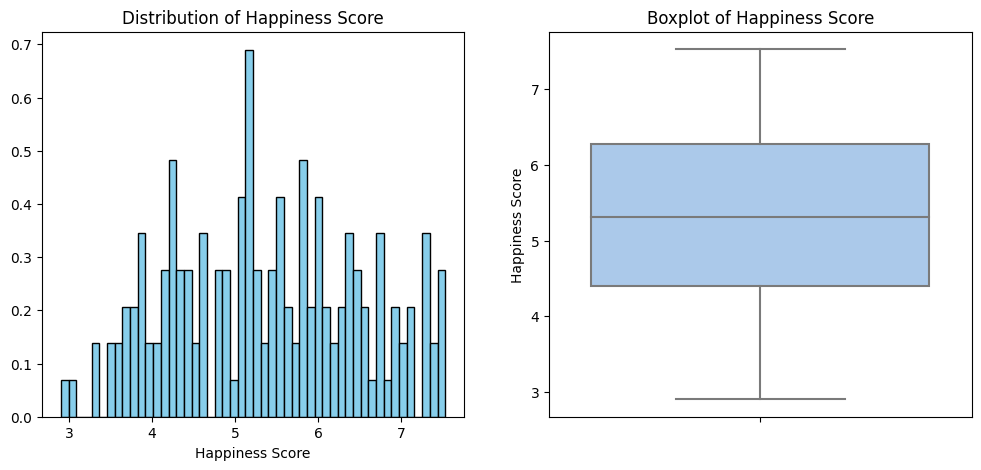

In [ ]:
# visualize the distribution of our main metric - Happiness score
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

# histogram
ax1.hist(df['Happiness Score'], density=True, edgecolor = 'black', bins = 50, color='skyblue')
ax1.set_xlabel("Happiness Score")
ax1.set_title ("Distribution of Happiness Score")

# boxplot
sns.boxplot(y=df['Happiness Score'], ax = ax2, palette='pastel')
ax2.set_title("Boxplot of Happiness Score")

plt.show()

**Key Ideas:**

1. The dataset comprises 157 rows and includes 13 variables, resulting in a total of 2,041 data points.
2. Among the variables, 10 are numeric and presented as floating-point values, 1 is numeric as integers ("Happiness Rank"), and 2 are categorical ("Country" and "Region").
3. The average happiness score across the dataset is approximately 5.38, with the highest recorded score at 7.526 and the lowest at 2.91.
4. No null or missing values are observed in the dataset, indicating a complete and reliable dataset.
5. The distribution of happiness scores exhibits multimodality, suggesting the presence of multiple peaks or concentrations at specific score intervals.
6. Moreover, the boxplot shows that the distribution of happiness score is approximately normal, with the majority of scores centered around the mean score. And no outliers show on the plot.

**3. Define Objectives**

Upon an initial examination of the dataset, the following key questions emerge as focal points for deeper analysis:

*(1) Correlation between Happiness score and rank*
- explore whether a higher happiness score is consistently associated with a higher rank.

*(2) Regional analysis of happiness score and rank*
- investigate the geographies with happiness scores and rank at the regional level.

*(3) Comparative analysis of high and low happiness regions*
- compare the score distribution in high and low happiness regions;
- examine how various contributing factors perform in regions with high average happiness scores compared to those with low average happiness scores.

*(4) Correlation among contributing factors*
- assess the degree of correlation between different factors influencing happiness scores. Understand how variables contribute to overall happiness levels.

**4. Analysis and Findings**


(1) Correlation: Hapiness Score vs. Rank

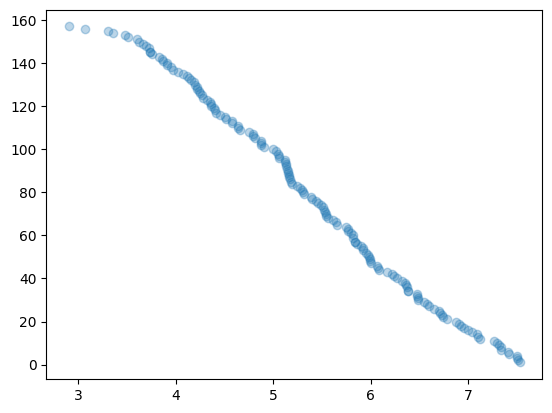

In [ ]:
# scatterplot to explore correlation
plt.scatter(df['Happiness Score'], df['Happiness Rank'], alpha=0.3)
plt.show()

In [ ]:
# correlation coefficient
score_rank = df['Happiness Rank'].corr(df['Happiness Score'])
print("correlation coefficient between Happiness Score and Rank is:", score_rank)

correlation coefficient between Happiness Score and Rank is: -0.9957433909369683


Findings:

- Upon examining the scatter plot and calculating the correlation coefficient between Happiness Score and Rank, a strong negative correlation is evident. Specifically, higher scores correspond to lower ranks, while lower scores align with higher ranking numbers.

(2) Regional Analysis

In [ ]:
# extract top 25% countries
df_sorted_asc = df.sort_values(by = 'Happiness Rank', ascending = True) # sort by rank values in ascending order
threshold = int(0.25 * len(df)) # set number of values of top 25%
top25_rank = df_sorted_asc.head(threshold) # store top25 rank rows into a new data frame

In [ ]:
# compare number of countries in each region in top25
countries_top25region = top25_rank['Region'].value_counts() # count number of countries in each region
countries_top25region

Western Europe                     16
Latin America and Caribbean        10
Middle East and Northern Africa     5
North America                       2
Australia and New Zealand           2
Southeastern Asia                   2
Central and Eastern Europe          1
Eastern Asia                        1
Name: Region, dtype: int64

Text(0, 0.5, 'Counts')

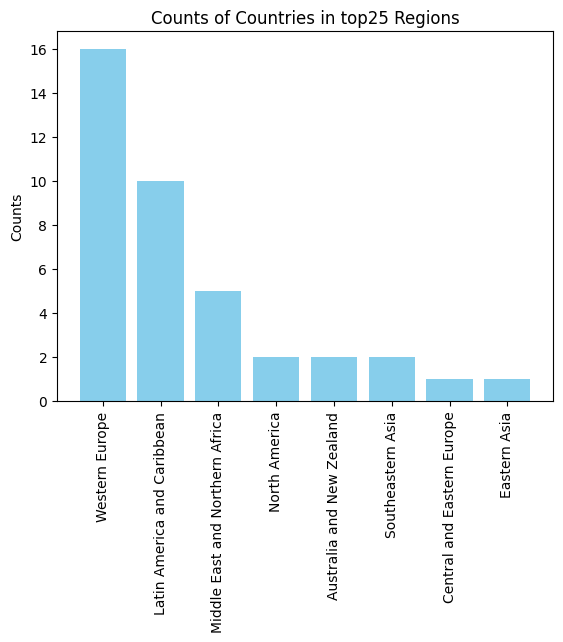

In [ ]:
# plot counts
plt.bar(countries_top25region.index, countries_top25region.values, color = 'skyblue')
plt.xticks(rotation = 90)
plt.title("Counts of Countries in top25 Regions")
plt.ylabel("Counts")

In [ ]:
# top25 mean score
meanscore_top25region = top25_rank.groupby('Region')['Happiness Score'].mean().sort_values(ascending = False)
meanscore_top25region

Region
Australia and New Zealand          7.323500
North America                      7.254000
Western Europe                     7.059312
Latin America and Caribbean        6.726200
Southeastern Asia                  6.606500
Central and Eastern Europe         6.596000
Middle East and Northern Africa    6.589800
Eastern Asia                       6.379000
Name: Happiness Score, dtype: float64

In [ ]:
# extract bottom 25% counties
df_sorted_desc = df.sort_values(by = 'Happiness Rank', ascending = False)
bottom25_rank = df_sorted_desc.head(threshold)

In [ ]:
# counts of each region
region_counts_bottom25 = bottom25_rank['Region'].value_counts()
region_counts_bottom25

Sub-Saharan Africa                 28
Central and Eastern Europe          4
Middle East and Northern Africa     3
Southeastern Asia                   2
Southern Asia                       1
Latin America and Caribbean         1
Name: Region, dtype: int64

Text(0.5, 1.0, 'Counts of Countries in Bottom25 Regions')

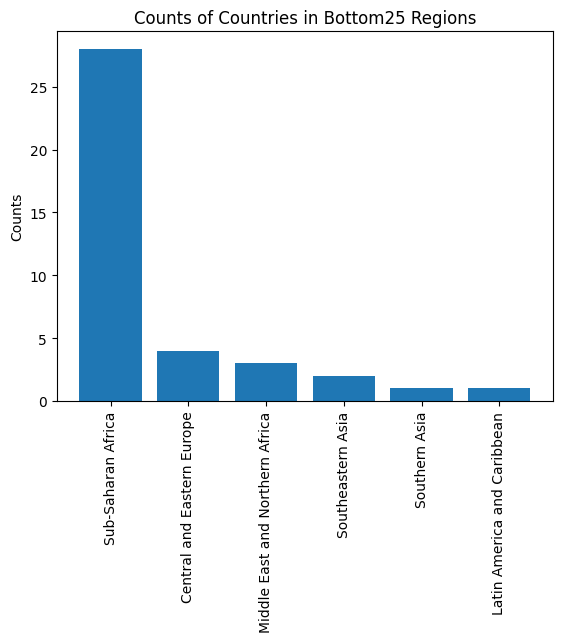

In [ ]:
# plot counts
plt.bar(region_counts_bottom25.index, region_counts_bottom25.values)
plt.xticks(rotation = 90)
plt.ylabel("Counts")
plt.title("Counts of Countries in Bottom25 Regions")

In [ ]:
# bottom25 mean score
mean_bottom25 = bottom25_rank.groupby('Region')['Happiness Score'].mean().sort_values(ascending = True)
mean_bottom25

Region
Southern Asia                      3.360000
Middle East and Northern Africa    3.718333
Sub-Saharan Africa                 3.881429
Latin America and Caribbean        4.028000
Southeastern Asia                  4.151000
Central and Eastern Europe         4.288250
Name: Happiness Score, dtype: float64

Findings:

Among the Top25 Rankings:
- Counts: Western Europe dominates the top25 rankings with the highest number of countries (16 countries).
- Mean Score: Despite Western Europe having the largest representation, Australia and New Zealand (7.3235), as well as North America (7.2540), exhibit relatively higher happiness mean scores compared to the Western Europe region (7.0593).

Among the Bottom 25 Rankings:
- Counts: Sub-Saharan Africa has the highest number of countries in the bottom 25 rankings (28 countries).
- Mean Score: Contrary to its high representation, Sub-Saharan Africa (3.8814), Sounthern Asia (3.3600), and the Middle East and Northern Africa(3.718) regions display relatively lower mean happiness scores.



(3) Comparative analysis of high and low happiness regions

Text(0.5, 1.0, 'Distribution of Happiness Score in Bottom 25%')

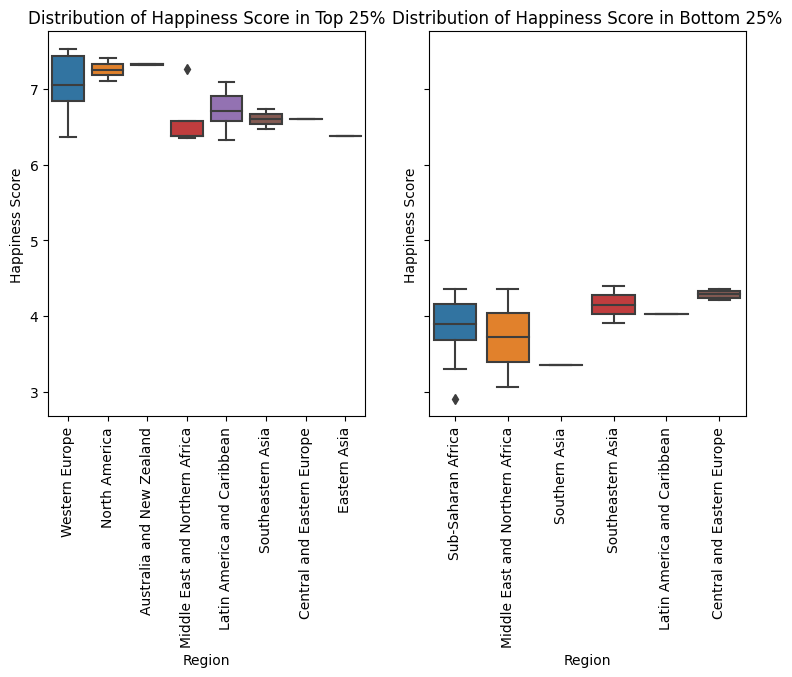

In [ ]:
# compare score distribution between top and bottom 25% regions
fig, (ax3,ax4) = plt.subplots(1,2, figsize=(9,5), sharey = True)

sns.boxplot(x = 'Region', y = 'Happiness Score', data = top25_rank, ax = ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
ax3.set_title("Distribution of Happiness Score in Top 25%")

sns.boxplot(x = 'Region', y = 'Happiness Score', data = bottom25_rank, ax = ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 90)
ax4.set_title("Distribution of Happiness Score in Bottom 25%")

<ipython-input-19-81a5c4a5f9f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top25_rank['Group'] = 'Top'
<ipython-input-19-81a5c4a5f9f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom25_rank['Group'] = 'Bottom'


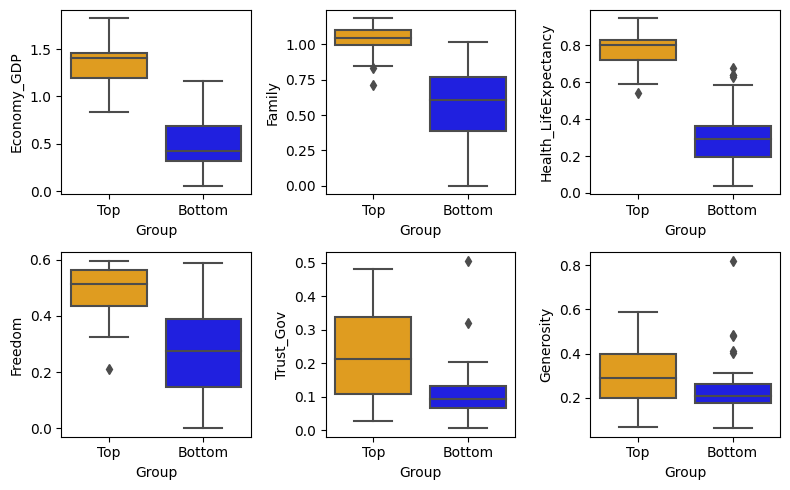

In [ ]:
# identify the different performance in contributing factors for low and high regions
top25_rank['Group'] = 'Top'
bottom25_rank['Group'] = 'Bottom'
combined_high_low = pd.concat([top25_rank, bottom25_rank])

# Rename the columns with simpler names
combined_high_low.rename(columns={'Economy (GDP per Capita)': 'Economy_GDP',
                                  'Health (Life Expectancy)': 'Health_LifeExpectancy',
                                  'Trust (Government Corruption)': 'Trust_Gov'}, inplace=True)

factors_list = ['Economy_GDP', 'Family', 'Health_LifeExpectancy', 'Freedom', 'Trust_Gov', 'Generosity']

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(8, 5))

# Create a boxplot using Seaborn with backticks around the column name
for i, factor in enumerate(factors_list):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x='Group', y=factor, data=combined_high_low, palette=['orange', 'blue'], ax=ax)
    ax.set_ylabel(factor)

plt.tight_layout()
plt.show()

Findings:

- The region with the highest mean score in the top25 (7.3235) exhibits a substantial difference of approximately 4 points compared to the region with the lowest mean score in the bottom25 (3.3600).

- Upon examining the side-by-side boxplots illustrating the distrubution of happiness scores for each of the six contributing factors between the top25 and bottom25 regions, it is evident that the bottom25 regions have lower medians for each contributing factor compared to the top25 regions. I opted to use the median due to its robustness, being less sensitive to extreme values than the mean. Notably, there is a significant difference in Economic GDP between the top25 and bottom25 regions, amounting to 1 point, while differences in other factors fall below 0.5 points.

(4) Correlation among contributing factors

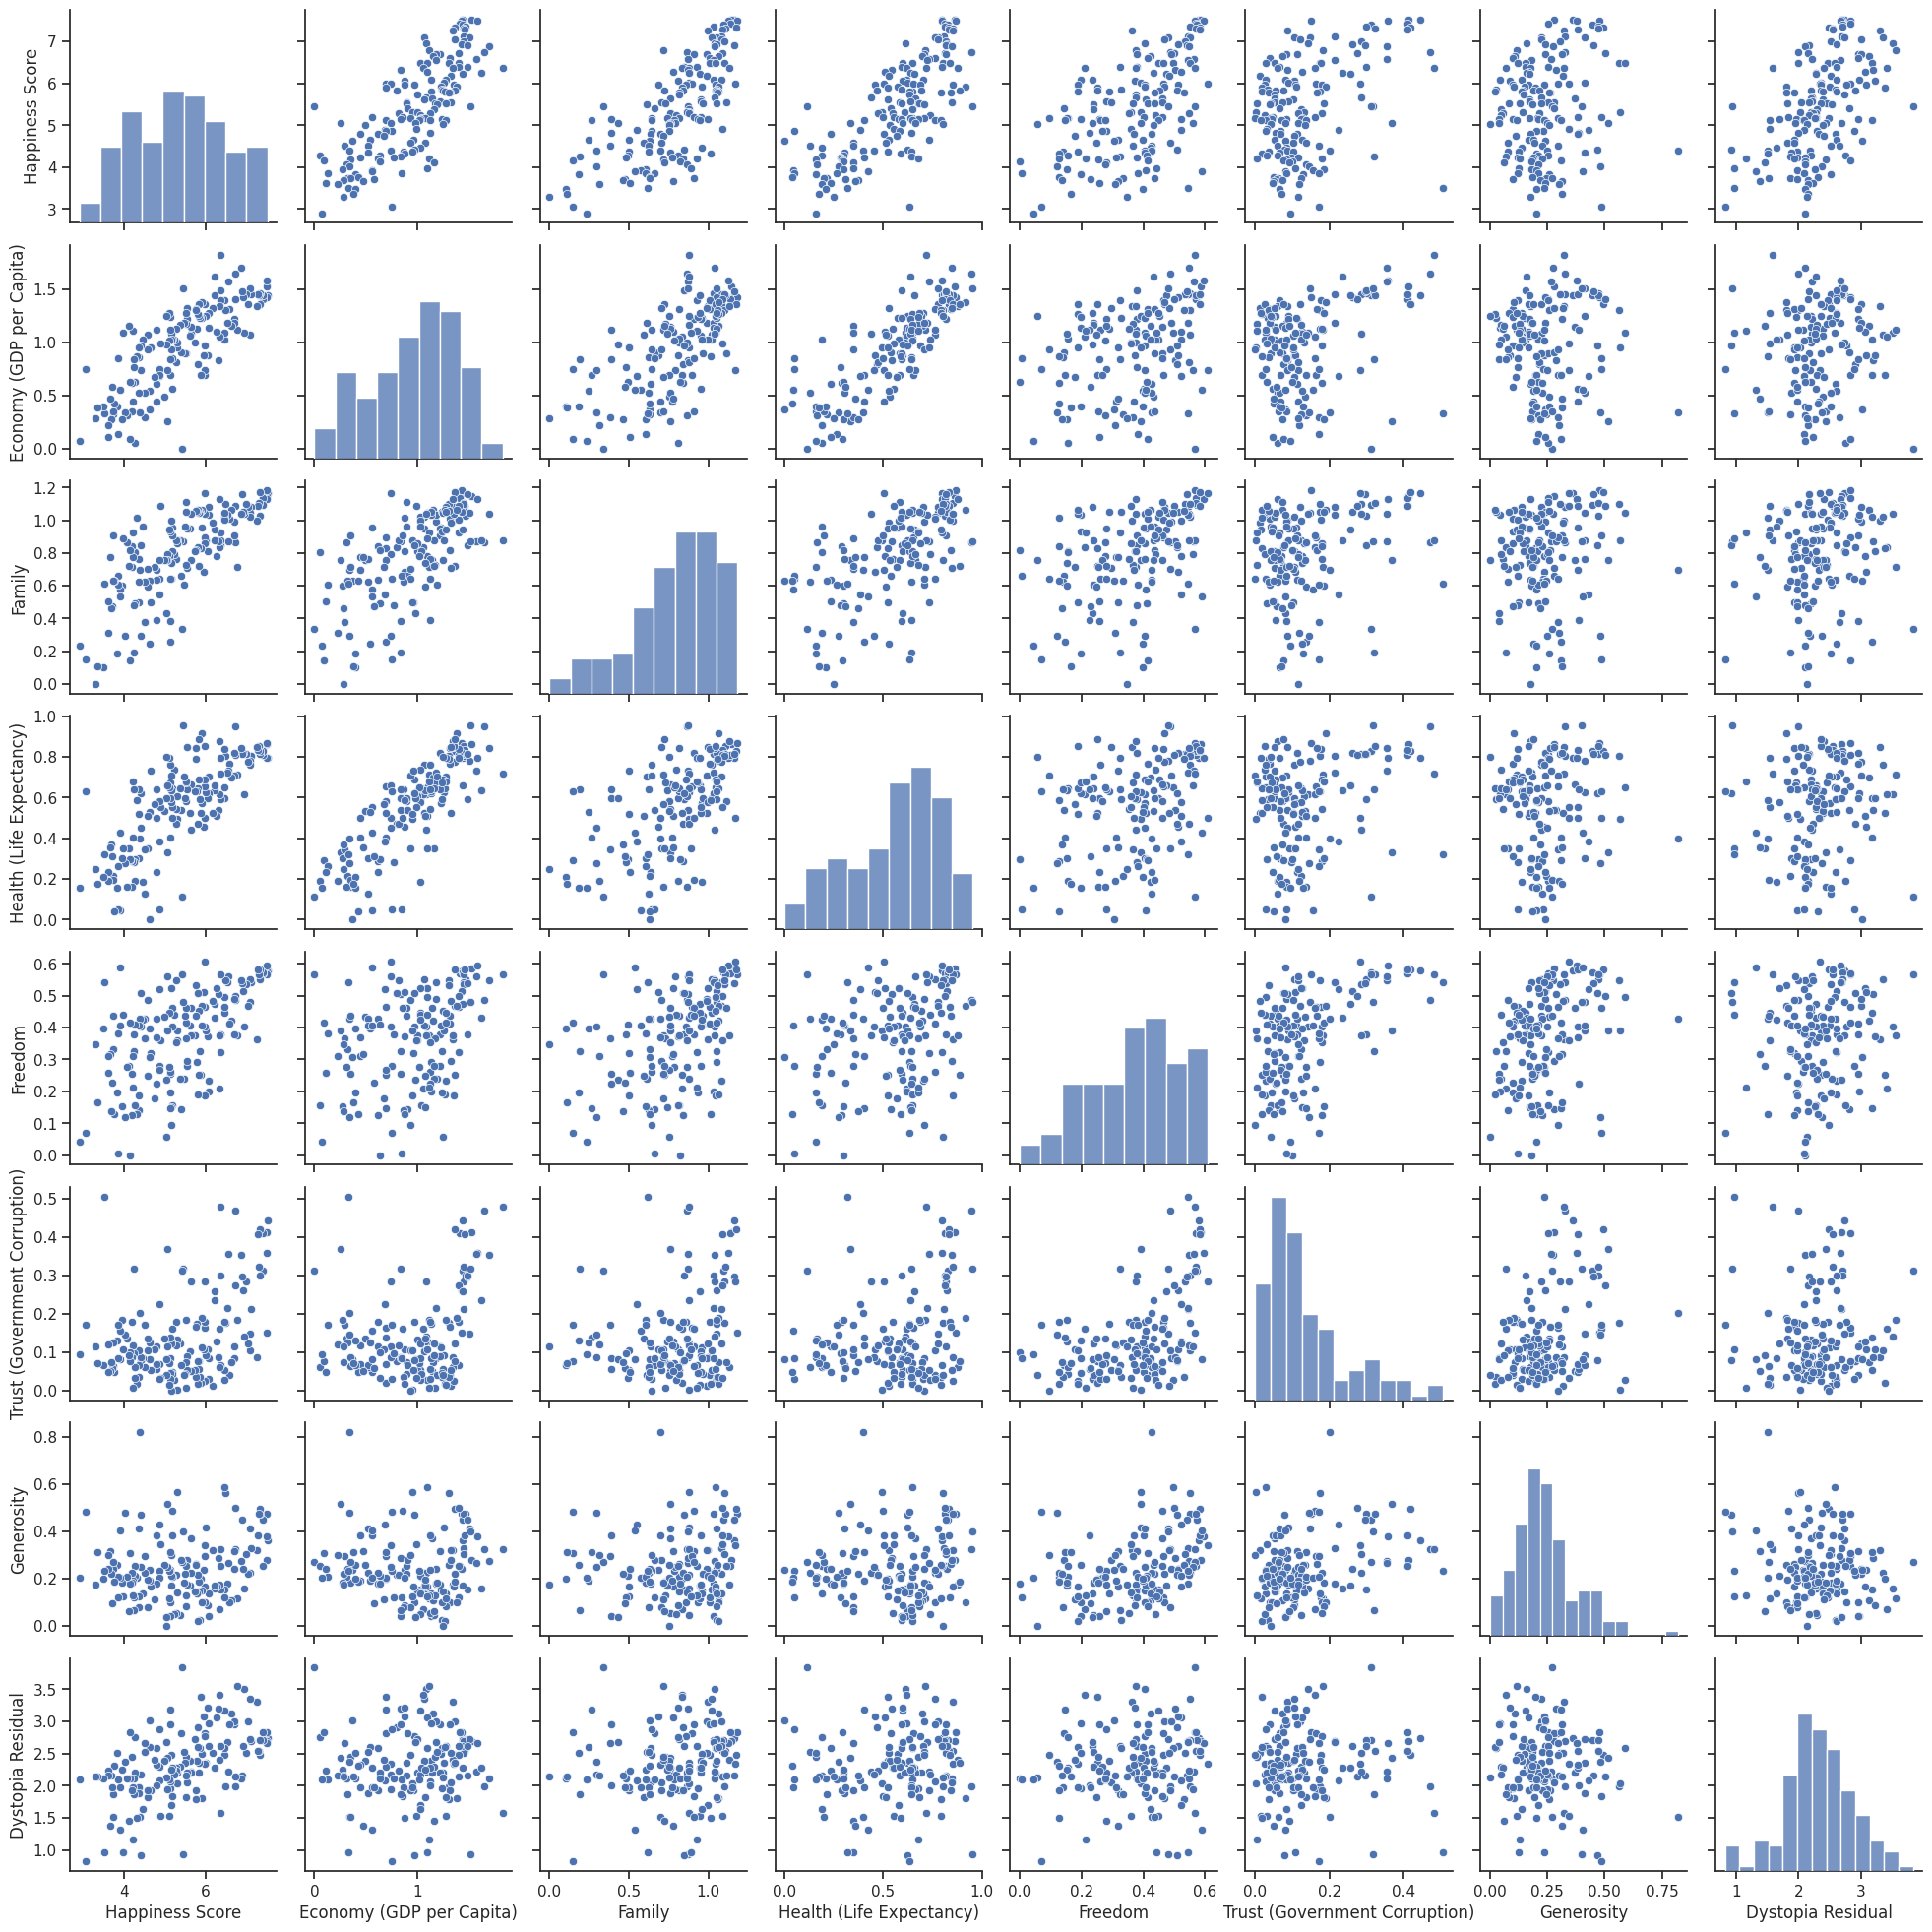

In [ ]:
# create a scatter matrix
columns_exclude = ['Country', 'Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval']
corr_df = df.drop(columns=columns_exclude)

sns.set(style='ticks')
scatter_matrix = sns.pairplot(corr_df)
plt.show()

In [ ]:
# Correlation coefficients summary
corr_matrix = corr_df.corr()
corr_happiscore = corr_matrix['Happiness Score'].sort_values(ascending = False)
corr_happiscore

Happiness Score                  1.000000
Economy (GDP per Capita)         0.790322
Health (Life Expectancy)         0.765384
Family                           0.739252
Freedom                          0.566827
Dystopia Residual                0.543738
Trust (Government Corruption)    0.402032
Generosity                       0.156848
Name: Happiness Score, dtype: float64

Findings:

- Analysis of the scatter plots depicting each factor against the happiness score reveals a consistent positive association. As each factor increases, there is a corresponding increase in the happiness score.

- Correlation coefficient computations further support the positive association between each factor and the happiness score. Notably, the Economy factor exhibits the strongest relationship. This finding aligns with the observations made in part3, emphasizing the significant difference in Economic GDP between the top25 and bottom25 regions.

- Combining insights from both the plots and correlation coefficients, it becomes evident that Economy, Health, and Family factors play pivotal roles in determining happiness scores. Higher indices in these factors correspond to elevated happiness scores. In contrast, the contributions of Freedom and Government Corruption factors are relatively weaker. Notably, Generosity demostrates the lowest association with happiness score, suggesting that the impact of generosity on happiness score is small.

**5. Ethics**

Working with a dataset on happiness scores and associated factors in different countries entails various ethical considerations:

- The dataset captures happiness as a subjective experience, subject to individual interpretations and cultural variations. The challenge lies in accounting for the diverse ways people define and express happiness, raising concerns about its representativeness for the broader population.

- The absence of information on participants' gender and socioeconomic status raises concerns about potential demographic biases in the sample. Without this data, there is a risk of certain groups being underrepresented or overrepresented, limiting the generalizability of findings.

- Happiness is a multifaceted construct influenced by various aspects of life. The dataset may only capture a subset of these factors, leading to an incomplete picture. A crucial ethical consideration is the potential for findings to be misinterpreted or misused, reinforcing existing biases or stereotypes. For instance, attributing the strongest correlation to the Economy factor might oversimplify the complex nature of happiness, reducing it to a monetary measure.